In [1]:
#보스턴 주택 데이터셋
from sklearn.datasets import load_boston

boston = load_boston()
dir(boston)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (

['DESCR', 'data', 'data_module', 'feature_names', 'filename', 'target']

In [2]:
# 데이터프레임
feature_df = pd.DataFrame(boston.data, columns=boston['feature_names'])
target = boston['target']

In [3]:
# 보스턴 집값 설명
# 1. CRIM : 범죄율
# 2. INDUS : 비소매상업지역 면적 비율
# 3. NOX : 일산화질소 농도
# 4. RM : 주택당 방 수
# 5. LSTAT : 인구 중 하위 계층 비율
# 6. B : 인구 중 흑인 비율
# 7. PTRATION : 학생/교사 비율
# 8. ZN : 25,000 평방피트를 초과 거주지역 비율
# 9. CHAS : 찰스 강의 경계 위치 유무 (더미변수) 1-경계위치, 0-경계에 위치하지 않음
# 10. AGE : 1940이전에 건축된 주택의 비율
# 11. RAD : 방사형 고속도로 까지 거리
# 12. DIS : 직업센터의 거리
# 13. TAX : 제산세율
feature_df.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33

In [4]:
col_names = list(feature_df.columns)
idx = col_names.index('CHAS')

In [5]:
from sklearn.preprocessing import StandardScaler
# 더미변수는 제외하고 정규화를 수행합니다.
feature_no_dummy_df = feature_df.drop(feature_df.columns[idx], axis = 1)
scaler = StandardScaler()
scaled_featrue = scaler.fit_transform(feature_no_dummy_df)

In [6]:
featrue_names = list(feature_no_dummy_df.columns)

In [7]:
feature_scaled_df = pd.DataFrame(scaled_featrue, columns=featrue_names)

In [8]:
feature_scaled_df

CRIM        ZN     INDUS       NOX        RM       AGE       DIS  \
0   -0.419782  0.284830 -1.287909 -0.144217  0.413672 -0.120013  0.140214   
1   -0.417339 -0.487722 -0.593381 -0.740262  0.194274  0.367166  0.557160   
2   -0.417342 -0.487722 -0.593381 -0.740262  1.282714 -0.265812  0.557160   
3   -0.416750 -0.487722 -1.306878 -0.835284  1.016303 -0.809889  1.077737   
4   -0.412482 -0.487722 -1.306878 -0.835284  1.228577 -0.511180  1.077737   
..        ...       ...       ...       ...       ...       ...       ...   
501 -0.413229 -0.487722  0.115738  0.158124  0.439316  0.018673 -0.625796   
502 -0.415249 -0.487722  0.115738  0.158124 -0.234548  0.288933 -0.716639   
503 -0.413447 -0.487722  0.115738  0.158124  0.984960  0.797449 -0.773684   
504 -0.407764 -0.487722  0.115738  0.158124  0.725672  0.736996 -0.668437   
505 -0.415000 -0.487722  0.115738  0.158124 -0.362767  0.434732 -0.613246   

          RAD       TAX   PTRATIO         B     LSTAT  
0   -0.982843 -0.666608 -1.459000  0.441052 -1.075562  
1   -0.867883 -0.987329 -0.303094  0.441052 -0.492439  
2   -0.867883 -0.987329 -0.303094  0.396427 -1.208727  
3   -0.752922 -1.106115  0.113032  0.416163 -1.361517  
4   -0.752922 -1.106115  0.113032  0.441052 -1.026501  
..        ...       ...       ...       ...       ...  
501 -0.982843 -0.803212  1.176466  0.387217 -0.418147  
502 -0.982843 -0.803212  1.176466  0.441052 -0.500850  
503 -0.982843 -0.803212  1.176466  0.441052 -0.983048  
504 -0.982843 -0.803212  1.176466  0.403225 -0.865302  
505 -0.982843 -0.803212  1.176466  0.441052 -0.669058  

[506 rows x 12 columns]

In [9]:
# 더미변수 데이터프레임 붙이기
feature_scaled_boston_df = pd.concat([feature_scaled_df, feature_df.CHAS], axis = 1)

In [10]:
feature_scaled_boston_df

CRIM        ZN     INDUS       NOX        RM       AGE       DIS  \
0   -0.419782  0.284830 -1.287909 -0.144217  0.413672 -0.120013  0.140214   
1   -0.417339 -0.487722 -0.593381 -0.740262  0.194274  0.367166  0.557160   
2   -0.417342 -0.487722 -0.593381 -0.740262  1.282714 -0.265812  0.557160   
3   -0.416750 -0.487722 -1.306878 -0.835284  1.016303 -0.809889  1.077737   
4   -0.412482 -0.487722 -1.306878 -0.835284  1.228577 -0.511180  1.077737   
..        ...       ...       ...       ...       ...       ...       ...   
501 -0.413229 -0.487722  0.115738  0.158124  0.439316  0.018673 -0.625796   
502 -0.415249 -0.487722  0.115738  0.158124 -0.234548  0.288933 -0.716639   
503 -0.413447 -0.487722  0.115738  0.158124  0.984960  0.797449 -0.773684   
504 -0.407764 -0.487722  0.115738  0.158124  0.725672  0.736996 -0.668437   
505 -0.415000 -0.487722  0.115738  0.158124 -0.362767  0.434732 -0.613246   

          RAD       TAX   PTRATIO         B     LSTAT  CHAS  
0   -0.982843 -0.666608 -1.459000  0.441052 -1.075562   0.0  
1   -0.867883 -0.987329 -0.303094  0.441052 -0.492439   0.0  
2   -0.867883 -0.987329 -0.303094  0.396427 -1.208727   0.0  
3   -0.752922 -1.106115  0.113032  0.416163 -1.361517   0.0  
4   -0.752922 -1.106115  0.113032  0.441052 -1.026501   0.0  
..        ...       ...       ...       ...       ...   ...  
501 -0.982843 -0.803212  1.176466  0.387217 -0.418147   0.0  
502 -0.982843 -0.803212  1.176466  0.441052 -0.500850   0.0  
503 -0.982843 -0.803212  1.176466  0.441052 -0.983048   0.0  
504 -0.982843 -0.803212  1.176466  0.403225 -0.865302   0.0  
505 -0.982843 -0.803212  1.176466  0.441052 -0.669058   0.0  

[506 rows x 13 columns]

In [11]:
## 더미변수 외 정규화를 하였으며 전처리 완료

In [12]:
# 리지 회귀
from sklearn.linear_model import Ridge

alpha = np.logspace(-4, 4, 15)

data = []
for i, a in enumerate(alpha):
    ridge = Ridge(alpha=a).fit(feature_scaled_boston_df, target)
    data.append(pd.Series(np.hstack([ridge.coef_, ridge.intercept_])))

df_ridge = pd.DataFrame(data, index=alpha).T

ridge_names = list(feature_scaled_boston_df.columns)
ridge_names.append('intercept')

df_ridge.index = ridge_names
df_ridge

0.000100      0.000373      0.001389      0.005179      \
CRIM          -0.928145     -0.928143     -0.928136     -0.928109   
ZN             1.081567      1.081563      1.081548      1.081491   
INDUS          0.140898      0.140892      0.140872      0.140796   
NOX           -2.056715     -2.056707     -2.056677     -2.056565   
RM             2.674231      2.674234      2.674244      2.674280   
AGE            0.019466      0.019464      0.019460      0.019442   
DIS           -3.104042     -3.104034     -3.104008     -3.103908   
RAD            2.662211      2.662193      2.662125      2.661872   
TAX           -2.076776     -2.076759     -2.076697     -2.076466   
PTRATIO       -2.060606     -2.060604     -2.060599     -2.060577   
B              0.849268      0.849269      0.849270      0.849273   
LSTAT         -3.743626     -3.743623     -3.743612     -3.743570   
CHAS           2.686727      2.686708      2.686638      2.686376   
intercept     22.346966     22.346967     22.346972     22.346990   

           0.019307      0.071969      0.268270      1.000000      \
CRIM          -0.928009     -0.927635     -0.926250     -0.921180   
ZN             1.081279      1.080491      1.077568      1.066879   
INDUS          0.140512      0.139455      0.135546      0.121364   
NOX           -2.056148     -2.054593     -2.048820     -2.027615   
RM             2.674416      2.674922      2.676798      2.683623   
AGE            0.019376      0.019132      0.018225      0.014906   
DIS           -3.103537     -3.102152     -3.097005     -3.077970   
RAD            2.660929      2.657421      2.644431      2.597159   
TAX           -2.075604     -2.072397     -2.060535     -2.017521   
PTRATIO       -2.060495     -2.060189     -2.059054     -2.054853   
B              0.849284      0.849325      0.849478      0.850021   
LSTAT         -3.743414     -3.742834     -3.740674     -3.732662   
CHAS           2.685401      2.681773      2.668340      2.619508   
intercept     22.347057     22.347308     22.348237     22.351615   

           3.727594      13.894955     51.794747     193.069773    \
CRIM          -0.903496     -0.850525     -0.741239     -0.614750   
ZN             1.029673      0.919037      0.697246      0.481521   
INDUS          0.073388     -0.056630     -0.265208     -0.426867   
NOX           -1.952641     -1.719060     -1.203141     -0.632417   
RM             2.706948      2.770969      2.847817      2.624336   
AGE            0.003333     -0.031232     -0.101117     -0.182088   
DIS           -3.009121     -2.778919     -2.174902     -1.211032   
RAD            2.435503      1.980401      1.161688      0.357617   
TAX           -1.872348     -1.482495     -0.884708     -0.529006   
PTRATIO       -2.039616     -1.987967     -1.842335     -1.535505   
B              0.851703      0.854288      0.839166      0.733253   
LSTAT         -3.703343     -3.600922     -3.289757     -2.595157   
CHAS           2.453155      1.991858      1.206863      0.545502   
intercept     22.363122     22.395030     22.449328     22.495074   

           719.685673    2682.695795   10000.000000  
CRIM          -0.492757     -0.316847     -0.138439  
ZN             0.386955      0.273711      0.125659  
INDUS         -0.477876     -0.361644     -0.168039  
NOX           -0.401403     -0.298472     -0.144922  
RM             1.761712      0.807098      0.280835  
AGE           -0.261738     -0.247203     -0.125950  
DIS           -0.351618      0.042881      0.067755  
RAD           -0.127584     -0.231045     -0.125694  
TAX           -0.462532     -0.347560     -0.162355  
PTRATIO       -1.042509     -0.523731     -0.196205  
B              0.515686      0.291311      0.121184  
LSTAT         -1.613247     -0.770330     -0.285409  
CHAS           0.211081      0.069641      0.020116  
intercept     22.518206     22.527989     22.531415

In [13]:
## 베이지안 회귀
import pymc3 as pm

In [14]:
beta_names = list(feature_scaled_boston_df.columns)

In [15]:
# 사전 분포 확률이 pm.Normal(beta, mu=0, tau=1) 일 때
burnin, num_samples = 3000, 10000
with pm.Model() as model:
    betas = [pm.Normal(beta, mu=0, tau=1) for beta in beta_names]
    # x1 = pm.Normal('x1', mu=0, tau=1)
    
    intercept = pm.Normal('intercept', mu=0, tau=1)
    # prior on Normal/T error variance. Gamma(1,1) has mean=1, variance=1
    
    tau = pm.Gamma('tau', 1, 1)
    # Likelihood
    # mu ~ beta0 + beta1 * x1 + beta2 * x2 + beta3 * x3
    mu = intercept + sum(betas[n]*feature_scaled_boston_df.values[:,n] for n in range(len(betas)))
    
    y_obs = pm.Normal('y_obs', mu=mu, tau=tau, observed=target)
    
    # Sample
    start = pm.find_MAP()
    print("starting trace at MAP:", start)
    step = pm.NUTS()
    trace = pm.sample(num_samples, step, start, progressbar=True)[burnin: ]


starting trace at MAP: {'CRIM': array(-0.80552477), 'ZN': array(0.84360089), 'INDUS': array(-0.15671522), 'NOX': array(-1.56432155), 'RM': array(2.79914138), 'AGE': array(-0.06670219), 'DIS': array(-2.59372164), 'RAD': array(1.66856751), 'TAX': array(-1.22188041), 'PTRATIO': array(-1.92851479), 'B': array(0.84440619), 'LSTAT': array(-3.50203057), 'CHAS': array(2.34598742), 'intercept': array(21.39248729), 'tau_log__': array(-3.14129949), 'tau': array(0.04322659)}


/var/folders/72/463csspd3tx0ft106d5pb0zh0000gn/T/ipykernel_52883/1972240273.py:21: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(num_samples, step, start, progressbar=True)[burnin: ]
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [tau, intercept, CHAS, LSTAT, B, PTRATIO, TAX, RAD, DIS, AGE, RM, NOX, INDUS, ZN, CRIM]


Sampling 4 chains for 1_000 tune and 10_000 draw iterations (4_000 + 40_000 draws total) took 99 seconds.


In [16]:
pm.summary(trace)

Got error No model on context stack. trying to find log_likelihood in translation.
/opt/anaconda3/lib/python3.9/site-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
CRIM       -0.807  0.275  -1.326   -0.289      0.001    0.001   35158.0   
ZN          0.835  0.304   0.267    1.402      0.002    0.001   31795.0   
INDUS      -0.163  0.381  -0.872    0.565      0.002    0.002   33870.0   
NOX        -1.559  0.400  -2.300   -0.795      0.002    0.002   33800.0   
RM          2.802  0.283   2.277    3.338      0.002    0.001   29890.0   
AGE        -0.065  0.349  -0.723    0.589      0.002    0.002   33565.0   
DIS        -2.581  0.387  -3.278   -1.831      0.002    0.002   31472.0   
RAD         1.656  0.471   0.750    2.520      0.003    0.002   26423.0   
TAX        -1.207  0.507  -2.175   -0.267      0.003    0.002   27569.0   
PTRATIO    -1.930  0.272  -2.425   -1.403      0.002    0.001   32306.0   
B           0.847  0.244   0.396    1.309      0.001    0.001   38078.0   
LSTAT      -3.494  0.344  -4.135   -2.841      0.002    0.001   30149.0   
CHAS        2.335  0.658   1.079    3.553      0.004    0.003   34436.0   
intercept  21.371  0.224  20.957   21.798      0.001    0.001   34077.0   
tau         0.042  0.003   0.037    0.048      0.000    0.000   32330.0   

           ess_tail  r_hat  
CRIM        22120.0    1.0  
ZN          22191.0    1.0  
INDUS       21060.0    1.0  
NOX         21059.0    1.0  
RM          22325.0    1.0  
AGE         22593.0    1.0  
DIS         21663.0    1.0  
RAD         20681.0    1.0  
TAX         20631.0    1.0  
PTRATIO     21703.0    1.0  
B           21287.0    1.0  
LSTAT       21084.0    1.0  
CHAS        20139.0    1.0  
intercept   20837.0    1.0  
tau         20270.0    1.0

In [17]:
## 결과 값을 저장합니다.
bayesian_normal_tau1_df = pm.summary(trace)

Got error No model on context stack. trying to find log_likelihood in translation.
/opt/anaconda3/lib/python3.9/site-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


/var/folders/72/463csspd3tx0ft106d5pb0zh0000gn/T/ipykernel_52883/851248946.py:1: DeprecationWarning: The function `traceplot` from PyMC3 is just an alias for `plot_trace` from ArviZ. Please switch to `pymc3.plot_trace` or `arviz.plot_trace`.
  pm.traceplot(trace)
Got error No model on context stack. trying to find log_likelihood in translation.
/opt/anaconda3/lib/python3.9/site-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
Got error No model on context stack. trying to find log_likelihood in translation.


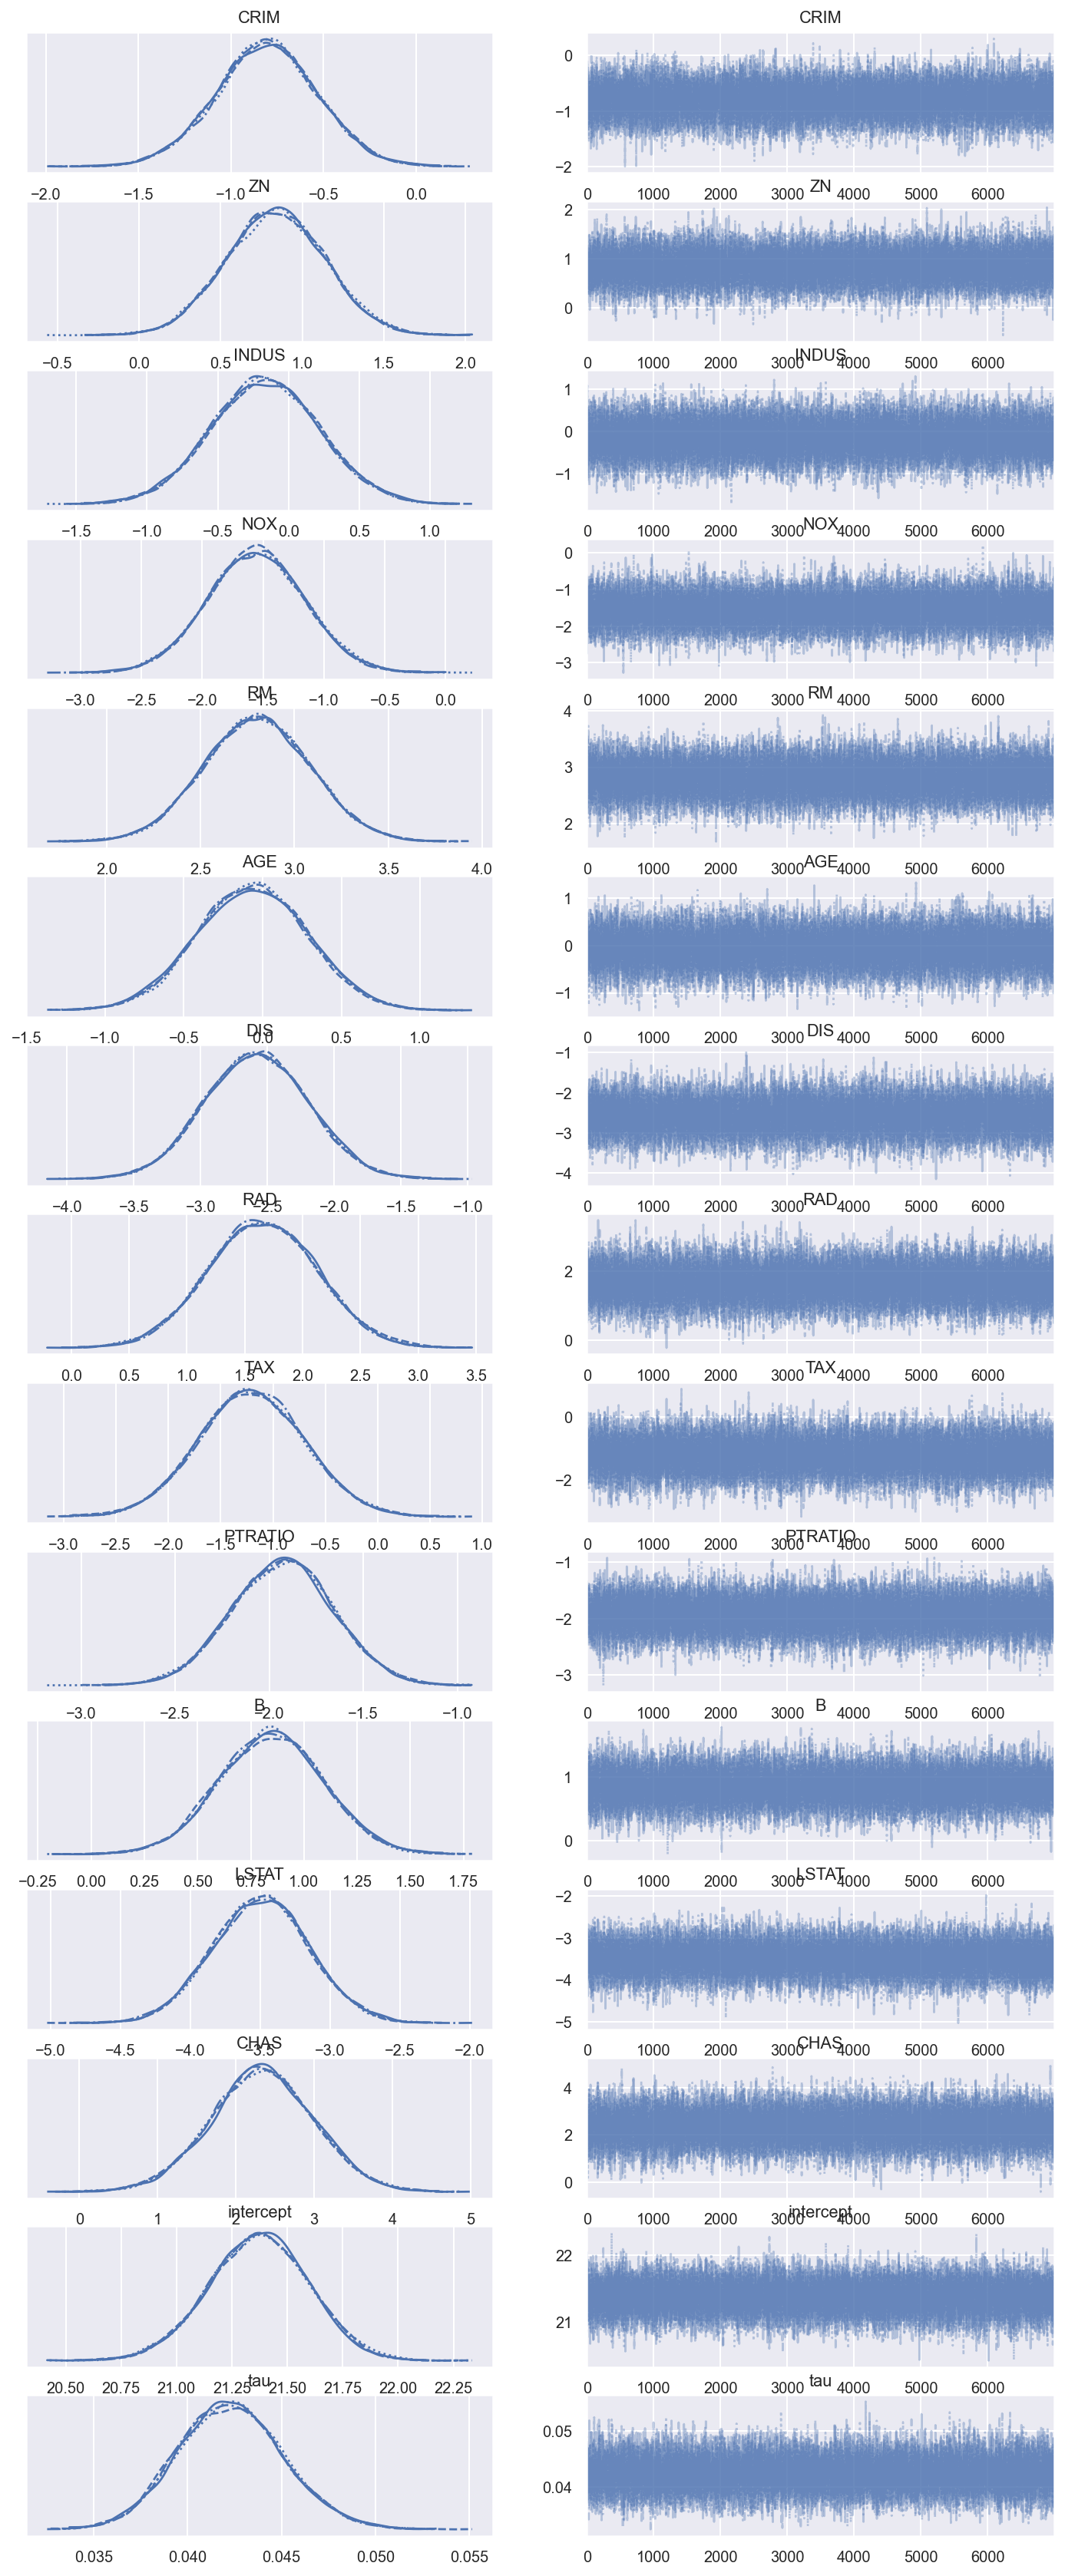

In [18]:
pm.traceplot(trace)
plt.show()

In [19]:
# 사전 분포 확률이 pm.Normal('intercept', mu=0, tau=100) 일 때
burnin, num_samples = 3000, 10000

with pm.Model() as model:
    betas = [pm.Normal(beta, mu=0, tau= 100) for beta in beta_names]
    # x1 = pm.Normal('x1', mu=0, tau=1)
    
    intercept = pm.Normal('intercept', mu=0, tau= 1)
    # prior on Normal/T error variance. Gamma(1,1) has mean=1, variance=1
    
    tau = pm.Gamma('tau', 1, 1)
    # Likelihood
    # mu ~ beta0 + beta1 * x1 + beta2 * x2 + beta3 * x3
    mu = intercept + sum(betas[n]*feature_scaled_boston_df.values[:,n] for n in range(len(betas)))
    
    y_obs = pm.Normal('y_obs', mu=mu, tau=tau, observed=target)
    
    # Sample
    start = pm.find_MAP()
    print("starting trace at MAP:", start)
    step = pm.NUTS()
    trace = pm.sample(num_samples, step, start, progressbar=True)[burnin: ]


starting trace at MAP: {'CRIM': array(-0.17581717), 'ZN': array(0.15834935), 'INDUS': array(-0.21144287), 'NOX': array(-0.18090982), 'RM': array(0.3713285), 'AGE': array(-0.15626969), 'DIS': array(0.07638387), 'RAD': array(-0.15485947), 'TAX': array(-0.20408558), 'PTRATIO': array(-0.25588343), 'B': array(0.1550166), 'LSTAT': array(-0.37264622), 'CHAS': array(0.041099), 'intercept': array(19.71293598), 'tau_log__': array(-4.28094366), 'tau': array(0.01382961)}


/var/folders/72/463csspd3tx0ft106d5pb0zh0000gn/T/ipykernel_52883/2147945898.py:22: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(num_samples, step, start, progressbar=True)[burnin: ]
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [tau, intercept, CHAS, LSTAT, B, PTRATIO, TAX, RAD, DIS, AGE, RM, NOX, INDUS, ZN, CRIM]


Sampling 4 chains for 1_000 tune and 10_000 draw iterations (4_000 + 40_000 draws total) took 56 seconds.


In [20]:
pm.summary(trace)

Got error No model on context stack. trying to find log_likelihood in translation.
/opt/anaconda3/lib/python3.9/site-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
CRIM       -0.176  0.096  -0.351    0.010      0.000    0.000   40560.0   
ZN          0.158  0.096  -0.019    0.342      0.000    0.000   38402.0   
INDUS      -0.212  0.097  -0.392   -0.030      0.000    0.000   42142.0   
NOX        -0.181  0.097  -0.360    0.009      0.000    0.000   41762.0   
RM          0.372  0.100   0.183    0.558      0.001    0.000   38285.0   
AGE        -0.156  0.097  -0.333    0.030      0.000    0.000   41789.0   
DIS         0.076  0.096  -0.104    0.256      0.000    0.000   41796.0   
RAD        -0.155  0.097  -0.337    0.026      0.000    0.000   39385.0   
TAX        -0.204  0.097  -0.383   -0.019      0.000    0.000   40269.0   
PTRATIO    -0.256  0.098  -0.438   -0.071      0.000    0.000   41591.0   
B           0.156  0.097  -0.027    0.339      0.000    0.000   42114.0   
LSTAT      -0.372  0.100  -0.558   -0.186      0.001    0.000   38776.0   
CHAS        0.042  0.099  -0.145    0.224      0.001    0.001   38841.0   
intercept  19.706  0.405  18.920   20.446      0.002    0.002   35730.0   
tau         0.014  0.001   0.012    0.016      0.000    0.000   31204.0   

           ess_tail  r_hat  
CRIM        22867.0    1.0  
ZN          21667.0    1.0  
INDUS       22442.0    1.0  
NOX         21586.0    1.0  
RM          21469.0    1.0  
AGE         22506.0    1.0  
DIS         21429.0    1.0  
RAD         22276.0    1.0  
TAX         22711.0    1.0  
PTRATIO     22869.0    1.0  
B           21593.0    1.0  
LSTAT       21620.0    1.0  
CHAS        22092.0    1.0  
intercept   21703.0    1.0  
tau         23684.0    1.0

In [21]:
## 결과 값을 저장합니다.
bayesian_normal_tau100_df = pm.summary(trace)

Got error No model on context stack. trying to find log_likelihood in translation.
/opt/anaconda3/lib/python3.9/site-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


/var/folders/72/463csspd3tx0ft106d5pb0zh0000gn/T/ipykernel_52883/851248946.py:1: DeprecationWarning: The function `traceplot` from PyMC3 is just an alias for `plot_trace` from ArviZ. Please switch to `pymc3.plot_trace` or `arviz.plot_trace`.
  pm.traceplot(trace)
Got error No model on context stack. trying to find log_likelihood in translation.
/opt/anaconda3/lib/python3.9/site-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
Got error No model on context stack. trying to find log_likelihood in translation.


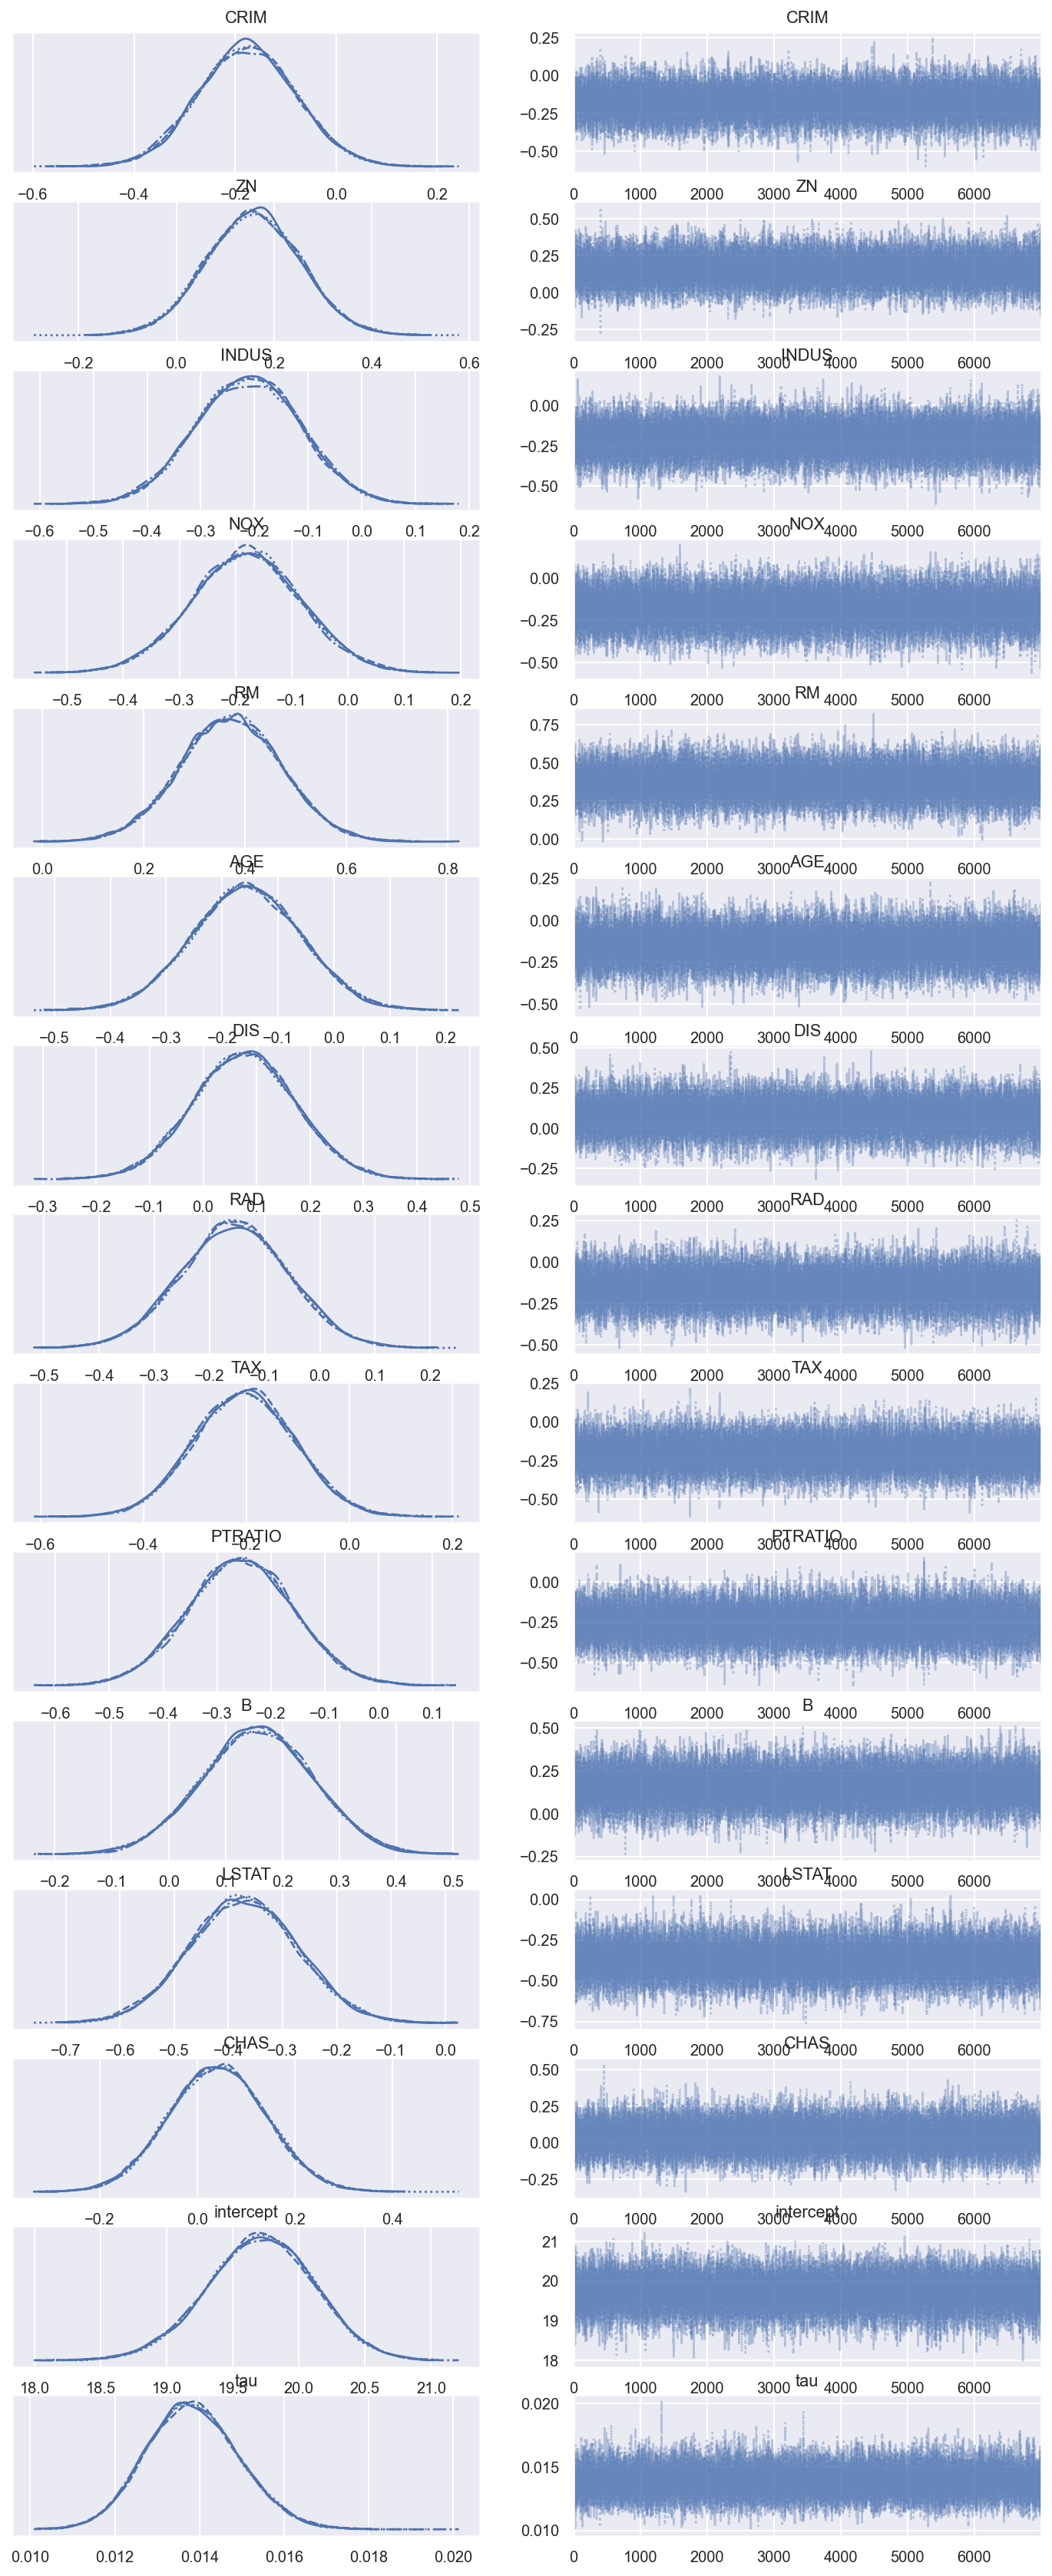

In [22]:
pm.traceplot(trace)
plt.show()

In [23]:
# 사전 분포 확률이 pm.Normal('intercept', mu=0, tau=0.000001) 일 때
burnin, num_samples = 3000, 10000
with pm.Model() as model:
    betas = [pm.Normal(beta, mu=0, tau=0.000001) for beta in beta_names]
    # x1 = pm.Normal('x1', mu=0, tau=1)
    
    intercept = pm.Normal('intercept', mu=0, tau=1)
    # prior on Normal/T error variance. Gamma(1,1) has mean=1, variance=1
    
    tau = pm.Gamma('tau', 1, 1)
    # Likelihood
    # mu ~ beta0 + beta1 * x1 + beta2 * x2 + beta3 * x3
    mu = intercept + sum(betas[n]*feature_scaled_boston_df.values[:,n] for n in range(len(betas)))
    
    y_obs = pm.Normal('y_obs', mu=mu, tau=tau, observed=target)
    
    # Sample
    start = pm.find_MAP()
    print("starting trace at MAP:", start)
    step = pm.NUTS()
    trace = pm.sample(num_samples, step, start, progressbar=True)[burnin: ]


starting trace at MAP: {'CRIM': array(-0.90996881), 'ZN': array(1.07546857), 'INDUS': array(0.08465418), 'NOX': array(-2.07565072), 'RM': array(2.66271406), 'AGE': array(-0.00562849), 'DIS': array(-3.09577923), 'RAD': array(2.58240281), 'TAX': array(-1.9779863), 'PTRATIO': array(-2.02623714), 'B': array(0.83310654), 'LSTAT': array(-3.71560124), 'CHAS': array(3.80033148), 'intercept': array(21.30565177), 'tau_log__': array(-3.13124881), 'tau': array(0.04366324)}


/var/folders/72/463csspd3tx0ft106d5pb0zh0000gn/T/ipykernel_52883/1499523217.py:21: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(num_samples, step, start, progressbar=True)[burnin: ]
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [tau, intercept, CHAS, LSTAT, B, PTRATIO, TAX, RAD, DIS, AGE, RM, NOX, INDUS, ZN, CRIM]


Sampling 4 chains for 1_000 tune and 10_000 draw iterations (4_000 + 40_000 draws total) took 107 seconds.


In [24]:
pm.summary(trace)

Got error No model on context stack. trying to find log_likelihood in translation.
/opt/anaconda3/lib/python3.9/site-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
CRIM       -0.910  0.290  -1.444   -0.345      0.001    0.001   42010.0   
ZN          1.075  0.327   0.475    1.702      0.002    0.001   35320.0   
INDUS       0.080  0.430  -0.751    0.868      0.002    0.002   35955.0   
NOX        -2.075  0.451  -2.899   -1.213      0.002    0.002   34892.0   
RM          2.665  0.300   2.113    3.240      0.002    0.001   33753.0   
AGE        -0.009  0.379  -0.735    0.687      0.002    0.002   34110.0   
DIS        -3.093  0.428  -3.899   -2.298      0.002    0.002   35525.0   
RAD         2.577  0.597   1.468    3.708      0.004    0.003   27155.0   
TAX        -1.972  0.651  -3.173   -0.740      0.004    0.003   28268.0   
PTRATIO    -2.024  0.291  -2.586   -1.496      0.002    0.001   35128.0   
B           0.833  0.251   0.365    1.306      0.001    0.001   39362.0   
LSTAT      -3.710  0.372  -4.409   -3.009      0.002    0.001   32685.0   
CHAS        3.831  0.881   2.175    5.494      0.004    0.003   43818.0   
intercept  21.275  0.229  20.842   21.703      0.001    0.001   39714.0   
tau         0.043  0.003   0.037    0.048      0.000    0.000   40730.0   

           ess_tail  r_hat  
CRIM        21974.0    1.0  
ZN          21204.0    1.0  
INDUS       23546.0    1.0  
NOX         21320.0    1.0  
RM          23133.0    1.0  
AGE         21484.0    1.0  
DIS         21264.0    1.0  
RAD         21751.0    1.0  
TAX         21544.0    1.0  
PTRATIO     22003.0    1.0  
B           20463.0    1.0  
LSTAT       21589.0    1.0  
CHAS        22148.0    1.0  
intercept   22631.0    1.0  
tau         21009.0    1.0

In [25]:
## 결과 값을 저장합니다.
bayesian_normal_tau0001_df = pm.summary(trace)

Got error No model on context stack. trying to find log_likelihood in translation.
/opt/anaconda3/lib/python3.9/site-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


/var/folders/72/463csspd3tx0ft106d5pb0zh0000gn/T/ipykernel_52883/851248946.py:1: DeprecationWarning: The function `traceplot` from PyMC3 is just an alias for `plot_trace` from ArviZ. Please switch to `pymc3.plot_trace` or `arviz.plot_trace`.
  pm.traceplot(trace)
Got error No model on context stack. trying to find log_likelihood in translation.
/opt/anaconda3/lib/python3.9/site-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
Got error No model on context stack. trying to find log_likelihood in translation.


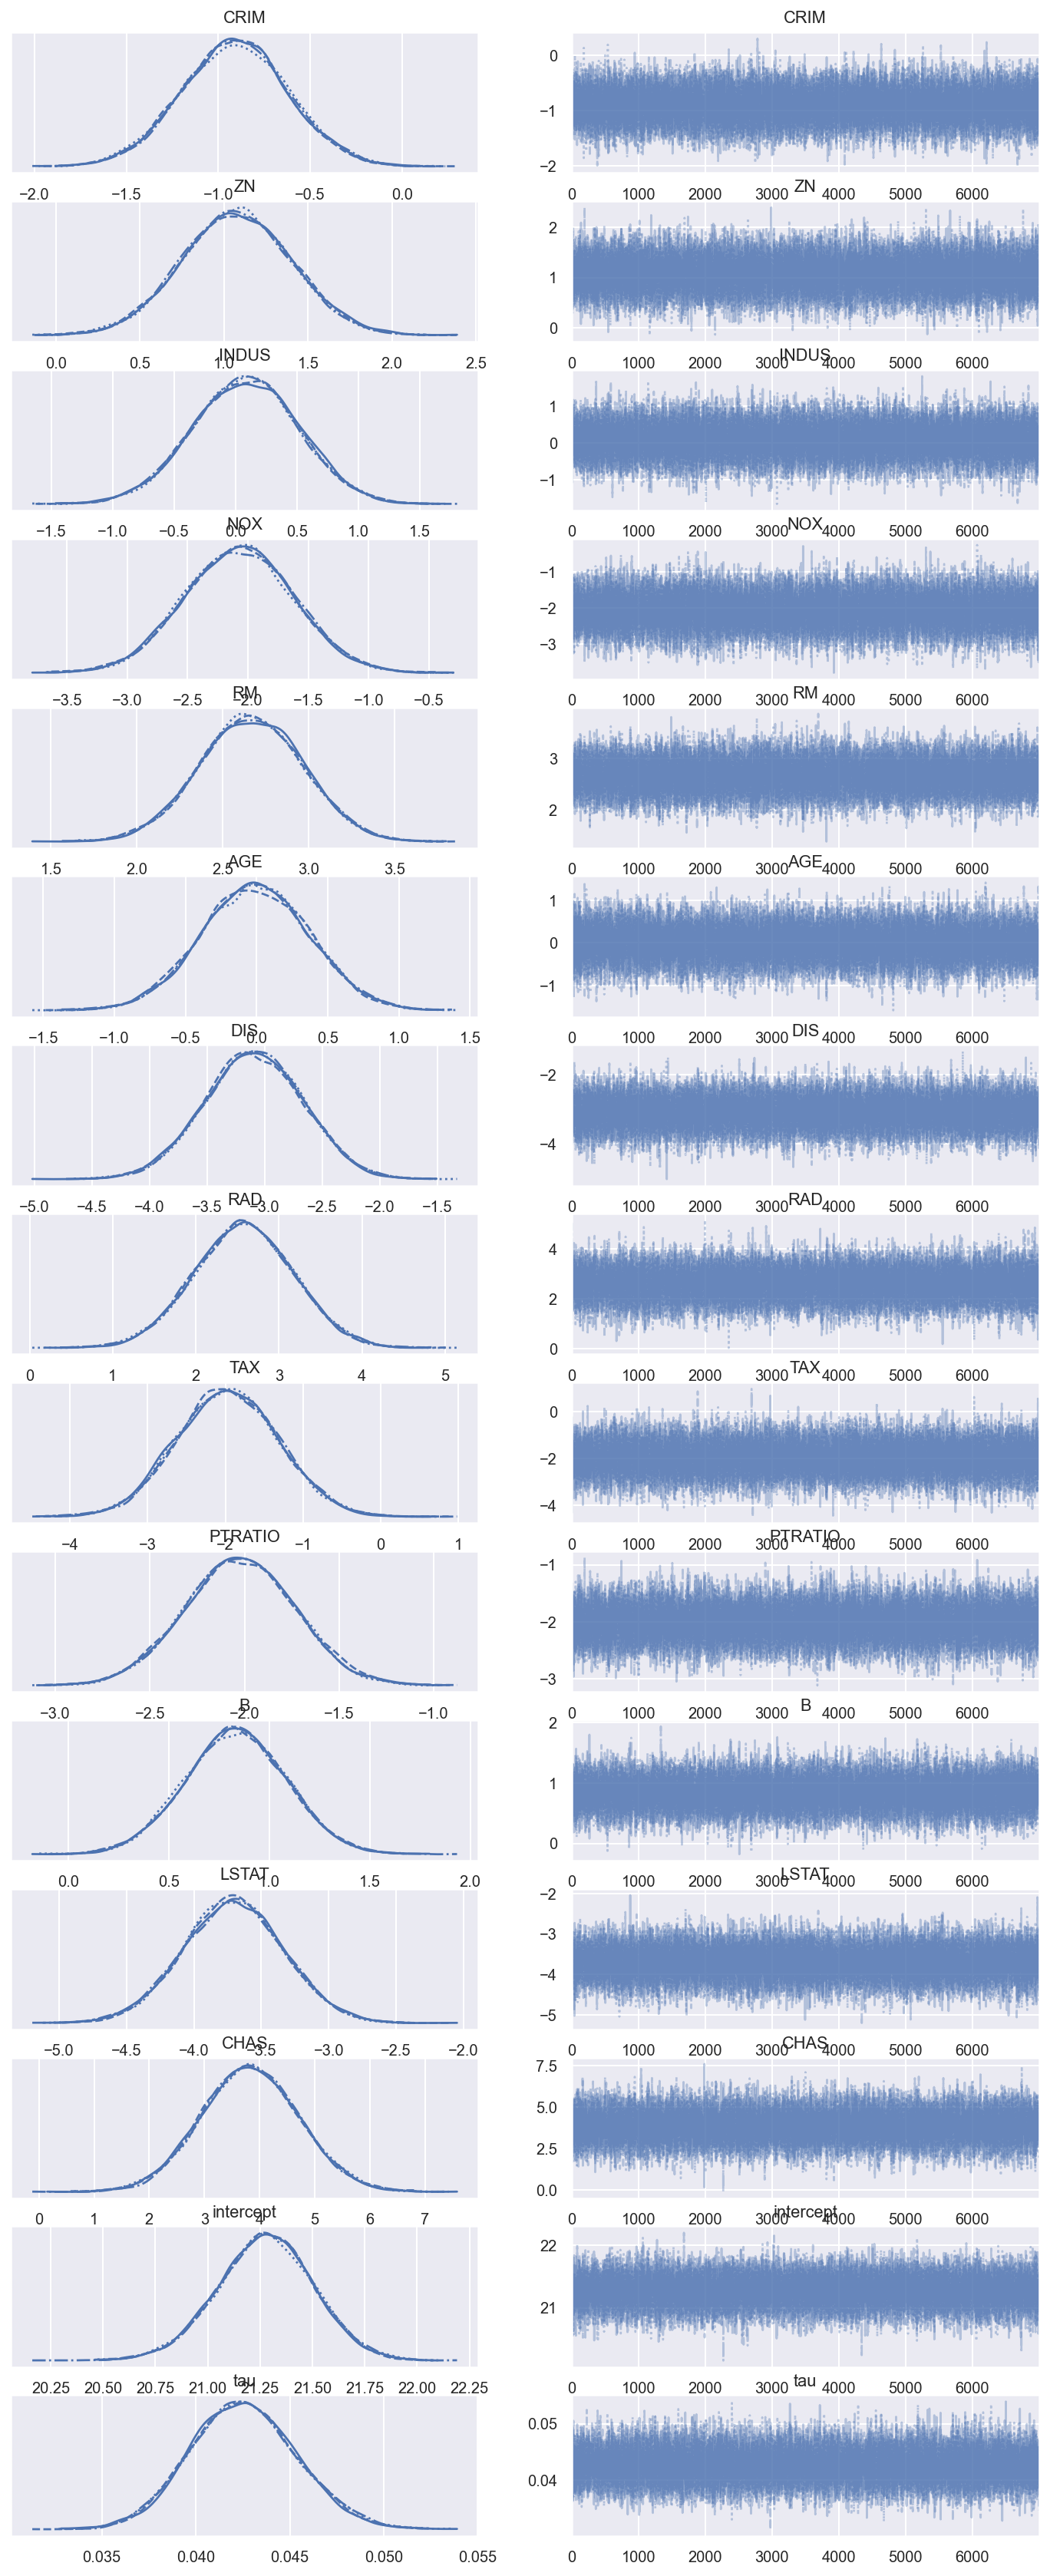

In [26]:
pm.traceplot(trace)
plt.show()

In [27]:
## tau에 대한 결과를 pm.summary(trace)의 데이터프레임으로 만듭니다.
bayesian_normal_tau1_mean = pd.DataFrame(bayesian_normal_tau1_df.iloc[:, 0])

In [28]:
bayesian_normal_tau1_mean.columns = ["tau_1_mean"]

In [29]:
bayesian_normal_tau100_mean =  pd.DataFrame(bayesian_normal_tau100_df.iloc[:, 0])

In [30]:
bayesian_normal_tau100_mean.columns = ["tau_100_mean"]

In [31]:
bayesian_normal_tau0001_mean = pd.DataFrame(bayesian_normal_tau0001_df.iloc[:, 0])

In [32]:
bayesian_normal_tau0001_mean.columns = ["tau0001_mean"]

In [33]:
## 데이터 프레임을 붙입니다.

In [34]:
bayesian_normal_mean_set_df = pd.concat([bayesian_normal_tau0001_mean, bayesian_normal_tau1_mean, bayesian_normal_tau100_mean], axis = 1)

In [35]:
df_ridge_alpha = df_ridge.iloc[:,[0,7,14]]

In [36]:
bayesian_normal_mean_com_df = pd.merge(bayesian_normal_mean_set_df, df_ridge_alpha, left_index=True, right_index=True,how = "left")

In [37]:
## 최종 답안 ##

## 과제 : 사전분포를 정규분포로 하였을 때 어느 부분에서 리지가 일어나는가

## 결론

## 사전분포를 정규분포로 하였을 때 (평균이 0) tau가 작을 수록 규제가 덜 일어난다, 즉 정규분포의 분산이 클 수록 규제가 덜 일어나는 것 (alpha, lamda가 작음)을 확인하였음 (tau는 분산의 역수)

## 사전분포를 정규분포로 하였을 때 (평균이 0) tau가 클 수록 규제가 많이 일어난다, 즉 정규분포의 분산이 작을수록 규제가 크게 일어나는 것 (alpha, lamda가 큼)을 확인하였음 (tau는 분산의 역수)

bayesian_normal_mean_com_df.round(3)

tau0001_mean  tau_1_mean  tau_100_mean  0.0001     1.0  10000.0
CRIM             -0.910      -0.807        -0.176  -0.928  -0.921   -0.138
ZN                1.075       0.835         0.158   1.082   1.067    0.126
INDUS             0.080      -0.163        -0.212   0.141   0.121   -0.168
NOX              -2.075      -1.559        -0.181  -2.057  -2.028   -0.145
RM                2.665       2.802         0.372   2.674   2.684    0.281
AGE              -0.009      -0.065        -0.156   0.019   0.015   -0.126
DIS              -3.093      -2.581         0.076  -3.104  -3.078    0.068
RAD               2.577       1.656        -0.155   2.662   2.597   -0.126
TAX              -1.972      -1.207        -0.204  -2.077  -2.018   -0.162
PTRATIO          -2.024      -1.930        -0.256  -2.061  -2.055   -0.196
B                 0.833       0.847         0.156   0.849   0.850    0.121
LSTAT            -3.710      -3.494        -0.372  -3.744  -3.733   -0.285
CHAS              3.831       2.335         0.042   2.687   2.620    0.020
intercept        21.275      21.371        19.706  22.347  22.352   22.531
tau               0.043       0.042         0.014     NaN     NaN      NaN